In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


In [6]:

linear_train_df = pd.read_csv('combined_data/linear_train_data.csv')
linear_val_df = pd.read_csv('combined_data/linear_val_data.csv')
linear_test_df = pd.read_csv('combined_data/linear_test_data.csv')
non_linear_train_df = pd.read_csv('combined_data//non_linear_train_data.csv')
non_linear_val_df = pd.read_csv('combined_data//non_linear_val_data.csv')
non_linear_test_df = pd.read_csv('combined_data//non_linear_test_data.csv')
overlapping_train_df = pd.read_csv('combined_data/overlapping_train_data.csv')
overlapping_val_df = pd.read_csv('combined_data/overlapping_val_data.csv')
overlapping_test_df = pd.read_csv('combined_data/overlapping_test_data.csv')

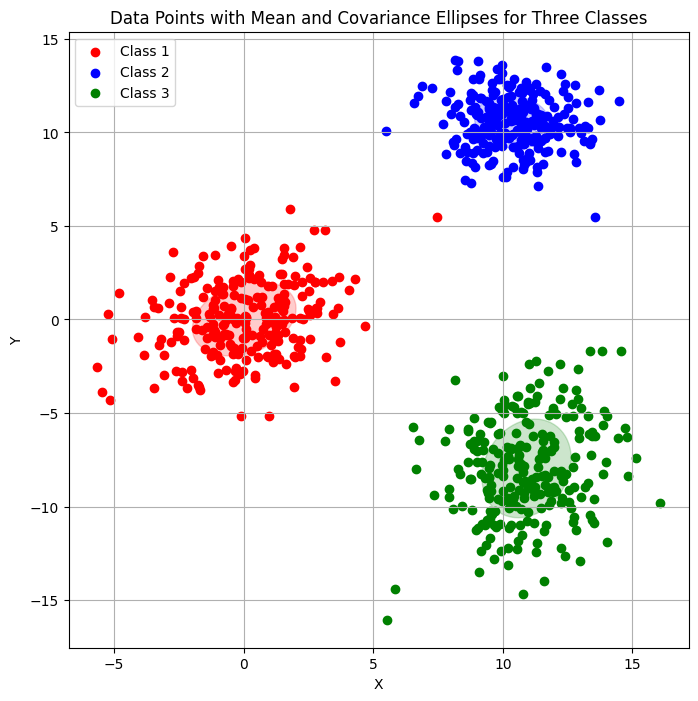

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

df = linear_train_df
# Initialize the figure
plt.figure(figsize=(8, 8))

# Define colors for each class (you can customize these)
class_colors = {'Class 1': 'red', 'Class 2': 'blue', 'Class 3': 'green'}

# Iterate through each class
for label, group in df.groupby('Label'):
    # Scatter plot for data points
    plt.scatter(group['X'], group['Y'], c=class_colors[label], label=label, marker='o')
    
    # Calculate the mean vector and covariance matrix
    mean_vector = group[['X', 'Y']].mean()
    cov_matrix = group[['X', 'Y']].cov()
    
    # Calculate eigenvalues and eigenvectors of the covariance matrix
    eigvalues, eigvectors = np.linalg.eig(cov_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigvalues)[::-1]
    eigvalues = eigvalues[sorted_indices]
    eigvectors = eigvectors[:, sorted_indices]
    
    # Calculate the angle of rotation for the ellipse
    angle = np.degrees(np.arctan2(*eigvectors[:, 0][::-1]))
    
    # Create and plot the covariance ellipse
    ellipse = Ellipse(xy=mean_vector, width=2*np.sqrt(eigvalues[0]), height=2*np.sqrt(eigvalues[1]),
                      angle=angle, color=class_colors[label], alpha=0.2)
    plt.gca().add_patch(ellipse)

# Set labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Data Points with Mean and Covariance Ellipses for Three Classes')

# Show the plot
plt.grid()
plt.show()


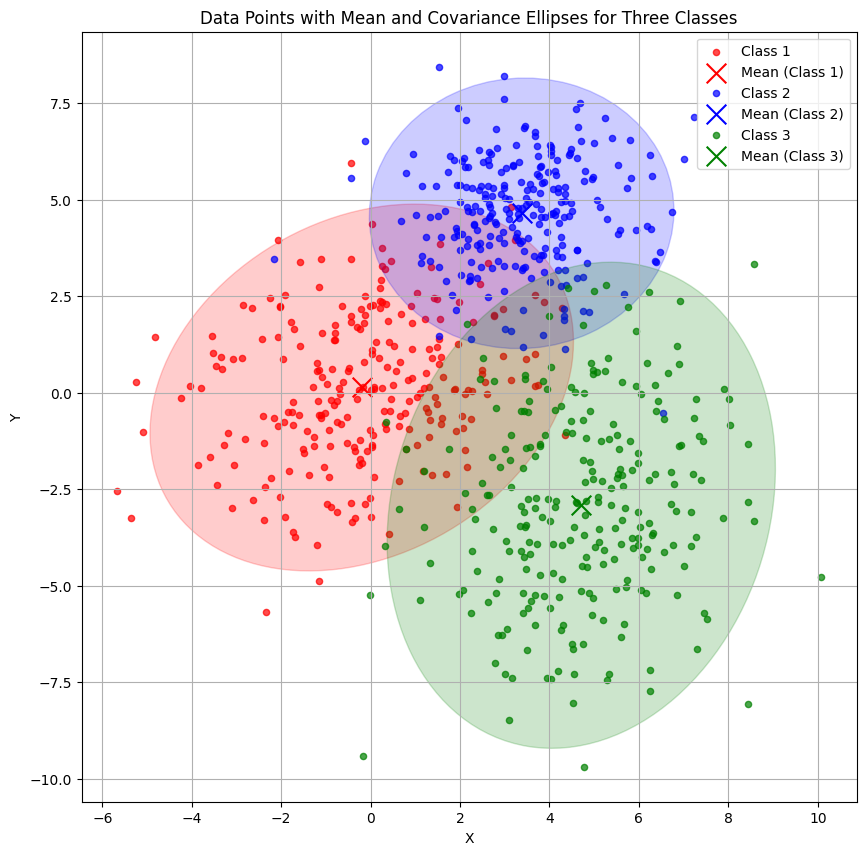

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

df = overlapping_train_df

# Initialize the figure
plt.figure(figsize=(10, 10))

# Define colors for each class (you can customize these)
class_colors = {'Class 1': 'red', 'Class 2': 'blue', 'Class 3': 'green'}

# Iterate through each class
for label, group in df.groupby('Label'):
    # Scatter plot for data points
    plt.scatter(group['X'], group['Y'], c=class_colors[label], label=label, s=20, marker='o', alpha=0.7)
    
    # Calculate the mean vector and covariance matrix
    mean_vector = group[['X', 'Y']].mean()
    cov_matrix = group[['X', 'Y']].cov()
    
    # Calculate eigenvalues and eigenvectors of the covariance matrix
    eigvalues, eigvectors = np.linalg.eig(cov_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigvalues)[::-1]
    eigvalues = eigvalues[sorted_indices]
    eigvectors = eigvectors[:, sorted_indices]
    
    # Calculate the angle of rotation for the ellipse
    angle = np.degrees(np.arctan2(*eigvectors[:, 0][::-1]))
    
    # Create and plot the covariance ellipse
    ellipse = Ellipse(xy=mean_vector, width=5*np.sqrt(eigvalues[0]), height=5*np.sqrt(eigvalues[1]),
                      angle=angle, color=class_colors[label], alpha=0.2)
    plt.gca().add_patch(ellipse)
    
    # Plot the mean point
    plt.scatter(mean_vector[0], mean_vector[1], c=class_colors[label], marker='x', s=200, label=f'Mean ({label})')

# Set labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Data Points with Mean and Covariance Ellipses for Three Classes')

# Show the plot
plt.grid()
plt.show()


In [50]:
def classwise_covariance_matrix(data, labels, average_type='1'):
    
    unique_labels = np.unique(labels)
    num_features = data.shape[1]
    class_variances = []

    for label in unique_labels:
        class_data = data[labels == label]
        class_variance = np.var(class_data, axis=0)
        class_variances.append(class_variance)

    avg_cov_matrix = np.mean(class_variances, axis=0)   
    print(np.mean(avg_cov_matrix))
    avg_variance = np.mean(avg_cov_matrix)
    sigma_squared_I = avg_variance * np.identity(num_features)
    print(sigma_squared_I)
    return sigma_squared_I


In [21]:
train_df = linear_train_df
test_df = linear_test_df

C:\Users\ash00\AppData\Local\Temp\ipykernel_11796\3228466266.py:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, pdf_values, colors=class_colors[label], alpha=0.5, label=label, levels=15)


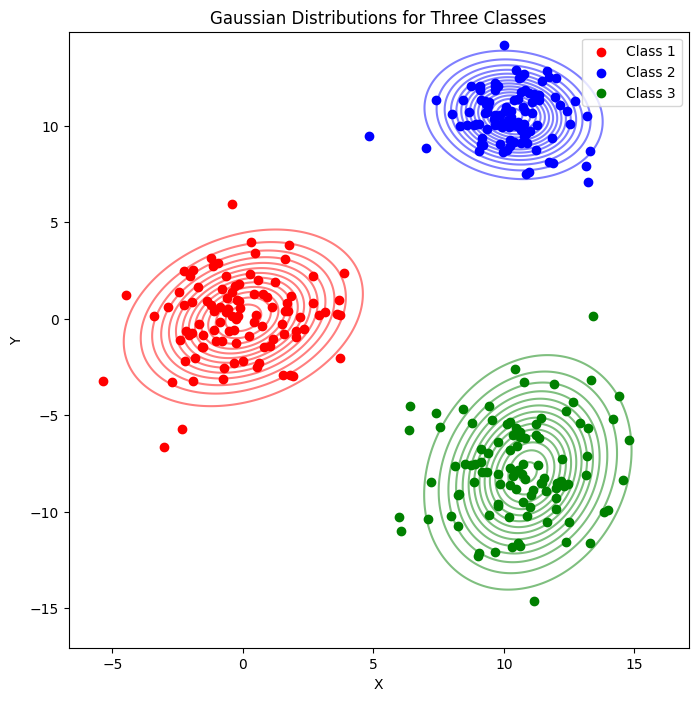

In [24]:
# Define colors for each class (you can customize these)
class_colors = {'Class 1': 'red', 'Class 2': 'blue', 'Class 3': 'green'}

# Create Gaussian density functions for each class
pdfs = {}
for label, group in train_df.groupby('Label'):
    mean = group[['X', 'Y']].mean().values
    cov = group[['X', 'Y']].cov().values
    pdfs[label] = multivariate_normal(mean=mean, cov=cov)

x_min, x_max = train_df['X'].min() - 1, train_df['X'].max() + 1
y_min, y_max = train_df['Y'].min() - 1, train_df['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

xy = np.c_[xx.ravel(), yy.ravel()]

# Evaluate the PDFs on the grid and plot Gaussian contours
plt.figure(figsize=(8, 8))
# Scatter plot for data points
for label, group in test_df.groupby('Label'):
    plt.scatter(group['X'], group['Y'], c=class_colors[label], label=label, marker='o')


for label, pdf in pdfs.items():
    pdf_values = pdf.pdf(xy).reshape(xx.shape)
    plt.contour(xx, yy, pdf_values, colors=class_colors[label], alpha=0.5, label=label, levels=15)


plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Gaussian Distributions for Three Classes')
plt.show();

In [27]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import multivariate_normal

# Sample data
class_colors = {'Class 1': 'red', 'Class 2': 'blue', 'Class 3': 'green'}

# Create Gaussian density functions for each class
pdfs = {}
for label, group in train_df.groupby('Label'):
    mean = group[['X', 'Y']].mean().values
    cov = group[['X', 'Y']].cov().values
    pdfs[label] = multivariate_normal(mean=mean, cov=cov)

# Define the grid for the 3D plot
x_min, x_max = train_df['X'].min() - 1, train_df['X'].max() + 1
y_min, y_max = train_df['Y'].min() - 1, train_df['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

xy = np.c_[xx.ravel(), yy.ravel()]

# Create a DataFrame for the PDF values
pdf_values = pd.DataFrame()
pdf_values['X'] = xx.ravel()
pdf_values['Y'] = yy.ravel()
for label, pdf in pdfs.items():
    pdf_values[label] = pdf.pdf(xy)

# Create the 3D PDF plot using Plotly
fig = px.scatter_3d(pdf_values, x='X', y='Y', z='Class 1', color='Class 1',
                    color_continuous_scale='viridis', opacity=0.5)

for label in pdfs.keys():
    fig.add_trace(px.scatter_3d(pdf_values, x='X', y='Y', z=label, color=label,
                                color_continuous_scale='viridis', opacity=0.5).data[0])

fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='PDF Value'),
                  title='3D Probability Density Function (PDF) Plot for Three Classes',
                  showlegend=True)

# Show the interactive 3D plot
fig.show()
